In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import IPython, torch, warnings
import geomsolver as gs

In [3]:
warnings.simplefilter('ignore')

<IPython.core.display.Javascript object>


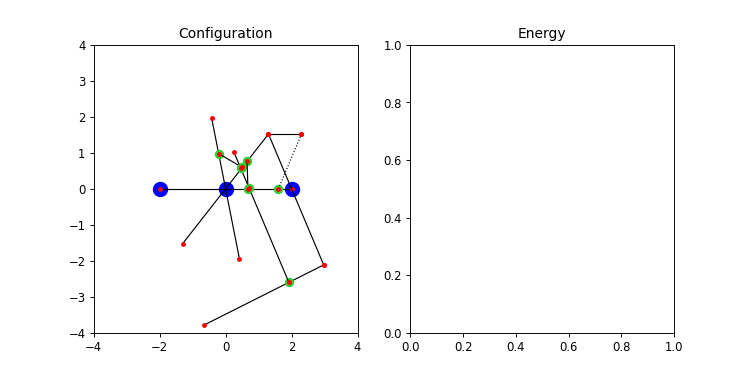

In [4]:
linkage = gs.Linkage()

In [5]:
#linkage.show_configuration(show_origin=False)

In [6]:
#linkage.show_energy_plot()

In [7]:
linkage.show_controllers(wait=True)

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

In [8]:
#linkage.set_parameter('line', 'b', 'theta', 1.5, solve=False)

In [9]:
A = linkage.add_anchorpoint(at=[0,0,0])
B = linkage.add_anchorpoint(at=[-2,0,0])
C = linkage.add_anchorpoint(at=[2,0,0])

In [10]:
bc = linkage.add_frompointsline(B, C)

In [11]:
de = A.add_onpointline(L=4, theta=50, beta=0.5)
de.params.beta.lock()

In [12]:
fg = A.add_onpointline(L=4, theta=100, beta=0.5)
fg.params.beta.lock()

In [13]:
H = de.add_onlinepoint(alpha=0.75)
H.lock()

In [14]:
J = fg.add_onlinepoint(alpha=0.75)
J.lock()

In [15]:
I = bc.add_onlinepoint(alpha=0.8)
I.lock()

In [16]:
K = de.add_onlinepoint(alpha=0.8)
K.lock()

In [17]:
hi = linkage.add_frompointsline(H, I)

In [18]:
jk = linkage.add_frompointsline(J, K)

In [19]:
en = linkage.add_onpointsline(L=4, parent1=de.p2, parent2=C, gamma=0)
en.lock()

In [20]:
nq = en.p2.add_frompointline(L=4, theta=-90, ux=en)
nq.lock()

In [21]:
hi.constrain_length(1)

In [22]:
jk.constrain_length(1)

In [23]:
#linkage.update()

In [24]:
#linkage.energy_plot.show_controller()

In [25]:
M = nq.add_onlinepoint(alpha=0.6)

In [26]:
lm = M.add_frompointline(L=4, theta=-90, ux=nq)
lm.lock()

In [27]:
_I = lm.add_onlinepoint(alpha=0.7)

In [28]:
_K = lm.add_onlinepoint(alpha=0.9)

In [29]:
ii = linkage.add_frompointsline(_I, I)

In [30]:
kk = linkage.add_frompointsline(_K, K)

In [31]:
I.unlock()

In [32]:
K.unlock()

In [33]:
ii.constrain_length(0)

In [34]:
kk.constrain_length(0)

In [35]:
"""
for i in range(1):
    de2en2.constrain_length(0)
    kk.constrain_length(0)
    ii.constrain_length(0)
"""

'\nfor i in range(1):\n    de2en2.constrain_length(0)\n    kk.constrain_length(0)\n    ii.constrain_length(0)\n'

In [36]:
ef = de.p2.add_frompointline(L=1, theta=0)

In [37]:
G = bc.add_onlinepoint(alpha=0.9)
G.lock()

In [38]:
fg = linkage.add_frompointsline(ef.p2, G)

In [39]:
linkage.solve = False

In [40]:
zz

NameError: name 'zz' is not defined

In [ ]:
linkage.solve = True

In [ ]:
fg.constrain_length(0)

In [ ]:
ah = A.add_frompointline(L=0.5, theta=100)

In [ ]:
hi = ah.p2.add_frompointline(L=0.5, theta=10)

In [ ]:
J = de.add_onlinepoint(alpha=0.8)
J.lock()

In [ ]:
ij = linkage.add_frompointsline(hi.p2, J)

In [ ]:
#ij.constrain_length(0)

In [ ]:
#linkage.create_controller(manual=True)